# -- Time Series Enalysis and Forecasting for Srock Market --

#### Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#### Loading Data

In [2]:
# define ticker symbol 
ticker = 'NKE'
# get data on this ticker
df = yf.download(ticker, start='1980-12-02', end='2024-12-31')
# Save to CSV
df.to_csv("nike_stock.csv", index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25824\266400052.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='1980-12-02', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NKE,NKE,NKE,NKE,NKE
Date,,,,,
1980-12-02,0.124361,0.127064,0.124361,0.124361,100710400
1980-12-03,0.121657,0.123008,0.121657,0.123008,25177600
1980-12-04,0.125712,0.127064,0.125712,0.125712,22694400
1980-12-05,0.118953,0.121657,0.118953,0.121657,7590400
1980-12-08,0.112194,0.113547,0.112194,0.113547,5414400


#### Data Preprocessing

In [4]:
df.isnull().sum()

Price   Ticker
Close   NKE       0
High    NKE       0
Low     NKE       0
Open    NKE       0
Volume  NKE       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11112 entries, 1980-12-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, NKE)   11112 non-null  float64
 1   (High, NKE)    11112 non-null  float64
 2   (Low, NKE)     11112 non-null  float64
 3   (Open, NKE)    11112 non-null  float64
 4   (Volume, NKE)  11112 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 520.9 KB


In [6]:
# ensure datetime index
df.index = pd.to_datetime(df.index)
# ensure chronological order
df.sort_values(by='Date', inplace=True)
# removing columns that are not needed
df = df[['Close']]
df.head()

Price,Close
Ticker,NKE
Date,
1980-12-02,0.124361
1980-12-03,0.121657
1980-12-04,0.125712
1980-12-05,0.118953
1980-12-08,0.112194


In [7]:
# taking last one year data
data = df.tail(252)
data.head()

Price,Close
Ticker,NKE
Date,
2023-12-29,104.954956
2024-01-02,103.002213
2024-01-03,100.575790
2024-01-04,98.893715
2024-01-05,98.681038


#### Exploratory Data Analysis (EDA)

In [8]:
data.describe()

Price,Close
Ticker,NKE
count,252.000000
mean,85.495220
std,10.002618
min,69.237976
25%,76.439913
50%,86.377911
75%,93.116741
max,104.954956


In [9]:
# plot the closing price using plotly
data.columns = ['Close']
fig = px.line(data,x=data.index, y='Close', title='Nike Stock Closing Prices - Last 1 Year')
# change the line color
fig.update_traces(line_color='green')
fig.show()


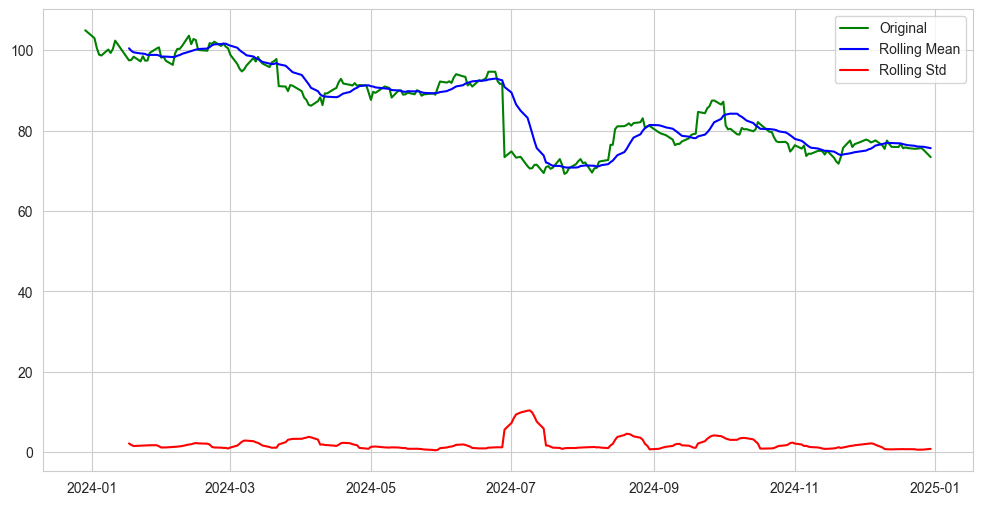

In [10]:
# check for stationarity using rolling statistics
rolmean = data['Close'].rolling(window=12).mean()
rolstd = data['Close'].rolling(window=12).std()
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.plot(data['Close'], color='green', label='Original')
plt.plot(rolmean, color='blue', label='Rolling Mean')
plt.plot(rolstd, color='red', label='Rolling Std')
plt.legend()
plt.show()

##### mean or std is not constant → non-stationary

In [11]:
# check for stationarity using adfuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8273122187246653
p-value: 0.3669886991070933


##### p-value > 0.05 → Non-stationary

##### Make data stationary

C:\Users\user\AppData\Local\Temp\ipykernel_25824\1532324087.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



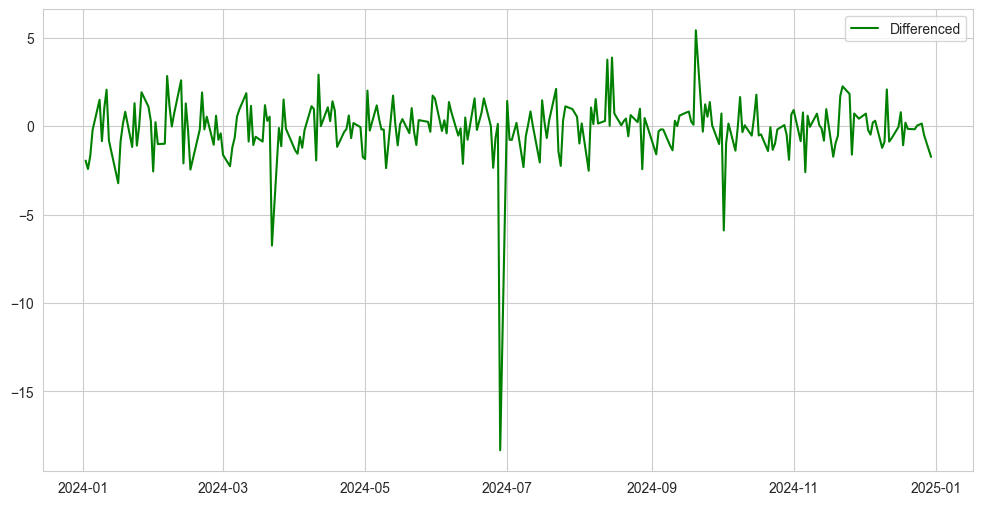

In [12]:
# make data stationary
data['Close_diff'] = data['Close'] - data['Close'].shift(1)
# plot the differenced data
plt.figure(figsize=(12,6))
plt.plot(data['Close_diff'], color='green', label='Differenced')
plt.legend()
plt.show()

##### 'd'=1
##### Find values for 'p' and 'q' using ACF and PACF

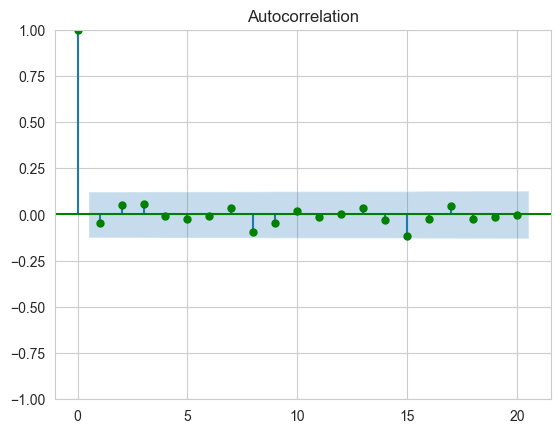

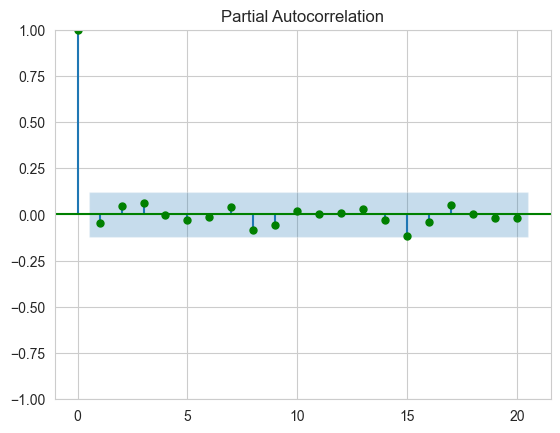

In [13]:
# Find values for p and q using ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close_diff'].dropna(), color='green', lags=20)
plt.show()
plot_pacf(data['Close_diff'].dropna(), color='green', lags=20)
plt.show()  


'd'=1
'p'=0
'q'=0

#### ARIMA model

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                    NKE   No. Observations:                11112
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13655.628
Date:                Tue, 30 Sep 2025   AIC                          27313.257
Time:                        17:21:13   BIC                          27320.572
Sample:                             0   HQIC                         27315.720
                              - 11112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.6840      0.001    494.318      0.000       0.681       0.687
Ljung-Box (L1) (Q):                   3.38   Jarque-Bera (JB):           3423329.40
Prob(Q):                              0.07   Pr

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\user\AppData\Local\Temp\ipykernel_25824\2871706108.py:15: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\user\AppData\Local\Temp\ipykernel_25824\2871706108.py:15: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



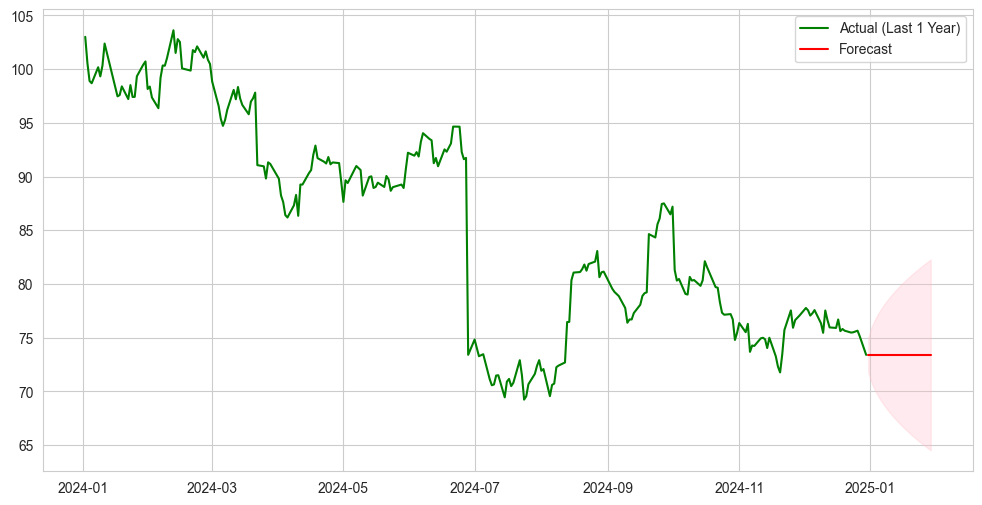

In [14]:
# apply ARIMA model
model = ARIMA(df['Close'], order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

# forecast for next 30 days
forecast = model_fit.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_values.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1),
                                      periods=30, freq='D')
conf_int.index = forecast_values.index

# taking last one year data for plotting
last_year_actual = df['Close'].last('1Y')

# plot the forecast
plt.figure(figsize=(12,6))
plt.plot(last_year_actual.index, last_year_actual, label='Actual (Last 1 Year)', color='green')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()


### ARIMA Model Evaluation

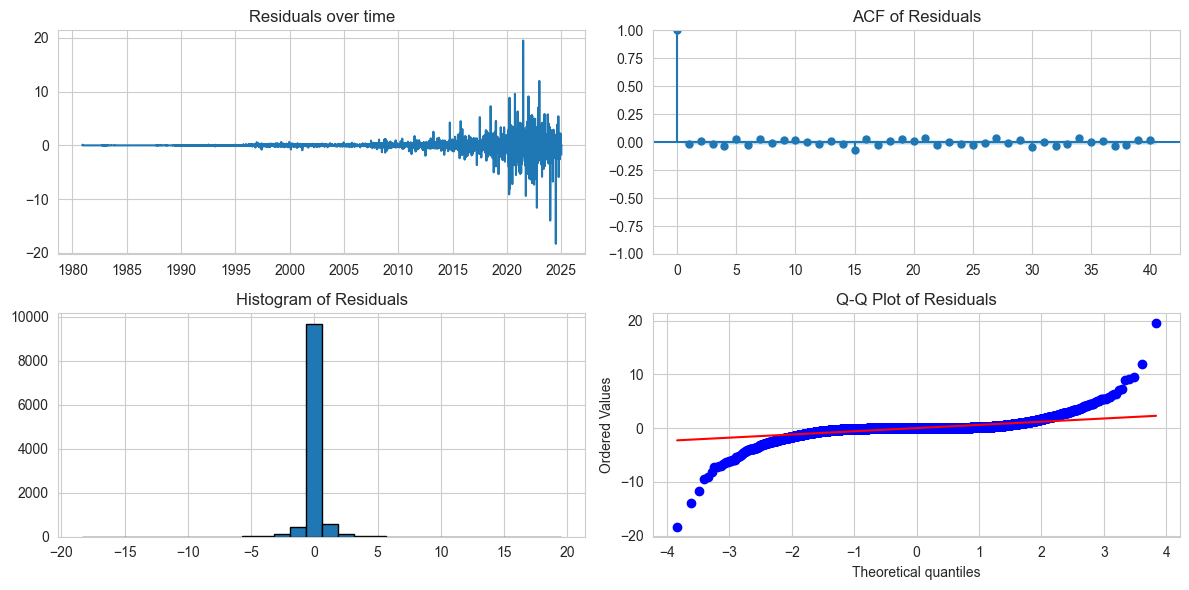


Ljung-Box test results:
      lb_stat     lb_pvalue
10  54.155772  4.538628e-08


In [15]:
# 1. Residual diagnostics
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

residuals = model_fit.resid
# Plot residuals
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(residuals)
plt.title("Residuals over time")

plt.subplot(2,2,2)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title("ACF of Residuals")

plt.subplot(2,2,3)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")

plt.subplot(2,2,4)
stats.probplot(residuals, dist="norm", plot=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# Ljung-Box test (check if residuals are random)
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box test results:")
print(lb_test)

In [16]:
# 2. Forecast accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Since we don't have actual future values, we'll use the last 30 days of actual data for evaluation
actual = df['Close'][-30:]
mae = mean_absolute_error(actual, forecast_values)
mse = mean_squared_error(actual, forecast_values)
mape = np.mean(np.abs((actual - forecast_values) / actual)) * 100  # Mean Absolute Percentage Error
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")



Mean Absolute Error (MAE): 2.546051788330078
Mean Squared Error (MSE): 7.927629098984956
Mean Absolute Percentage Error (MAPE): nan


### ARIMA Model Evaluation Summary :
#### The ARIMA model captures trend and autocorrelation well, but residual diagnostics show increasing variance and fat tails, meaning it struggles with volatility and extreme values.

### SARIMA Model

C:\Users\user\AppData\Local\Temp\ipykernel_25824\875223515.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



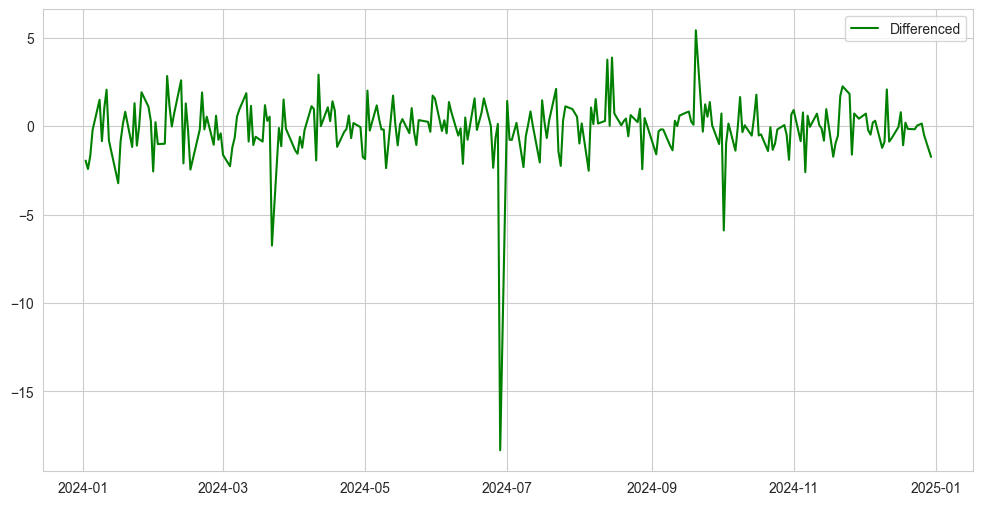

In [17]:
# lets plot the stationary data
data['Close_diff'] = data['Close'] - data['Close'].shift(1)
# plot the differenced data
plt.figure(figsize=(12,6))
plt.plot(data['Close_diff'], color='green', label='Differenced')
plt.legend()
plt.show()

#### Identify and Handel outliers 

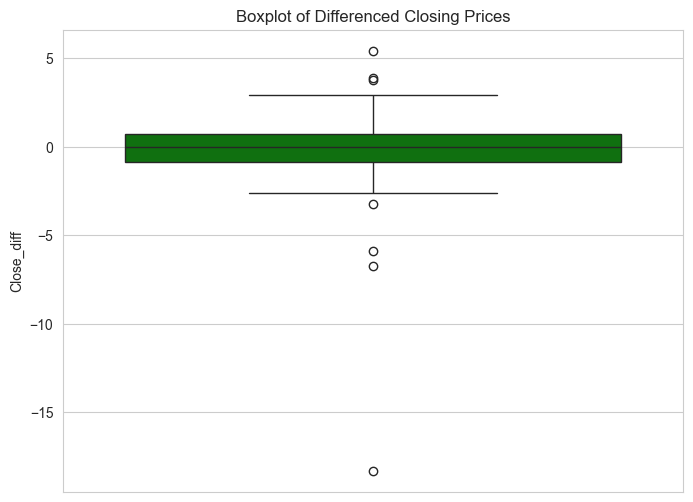

In [18]:
# identify outliers using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Close_diff'], color='green')
plt.title("Boxplot of Differenced Closing Prices")
plt.show()

In [19]:
# using IQR
Q1 = data['Close_diff'].quantile(0.25)
Q3 = data['Close_diff'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
# identify outliers
outliers = data[(data['Close_diff'] < lower_bound) | (data['Close_diff'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")
# display outliers
print(outliers)


Lower Bound: -3.1594200134277344, Upper Bound: 3.0357704162597656
Number of outliers detected: 7
                Close  Close_diff
Date                             
2024-01-16  98.333038   -3.228767
2024-03-22  91.058922   -6.752296
2024-06-28  73.406471  -18.329704
2024-08-13  76.454933    3.759445
2024-08-15  80.350708    3.876305
2024-09-20  84.641853    5.419731
2024-10-02  81.296097   -5.899109


In [20]:
# handling outliers by imputation
data['Close_diff'] = np.where((data['Close_diff'] < lower_bound) | (data['Close_diff'] > upper_bound),
                              data['Close_diff'].mean(), data['Close_diff'])


C:\Users\user\AppData\Local\Temp\ipykernel_25824\4215571080.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



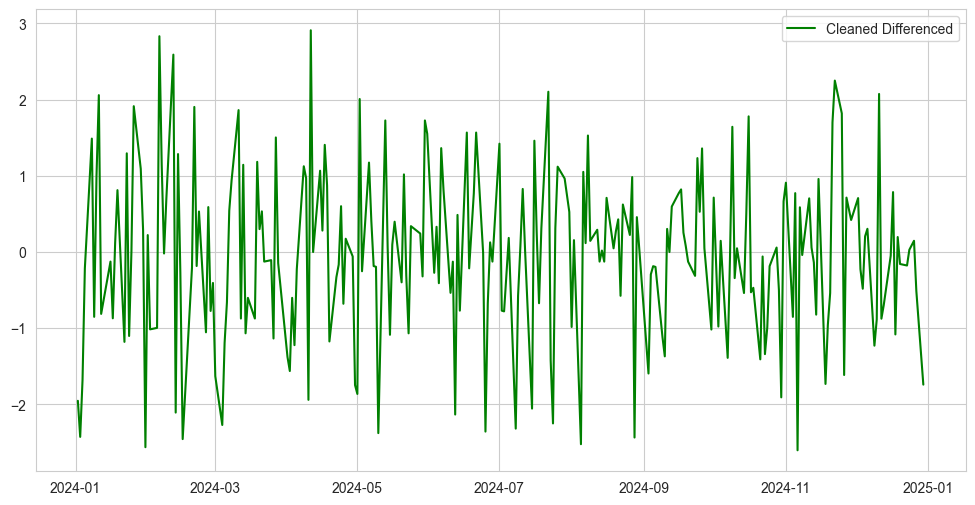

In [21]:
# plot the cleaned differenced data
plt.figure(figsize=(12,6))  
plt.plot(data['Close_diff'], color='green', label='Cleaned Differenced')
plt.legend()    
plt.show()

#### Check Seasonality

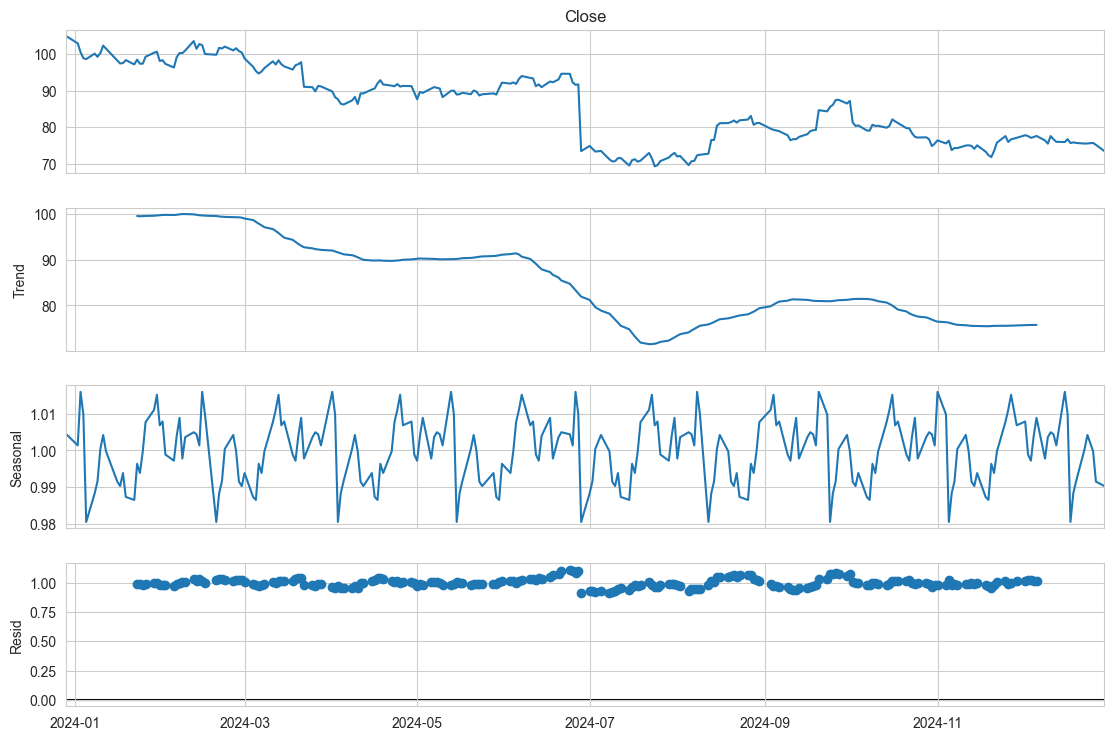

In [22]:
#check seasonality using seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=30)
decomposition.plot()
plt.gcf().set_size_inches(12, 8)
plt.show()

#### Find values for 'P', 'D', 'Q' and 's'

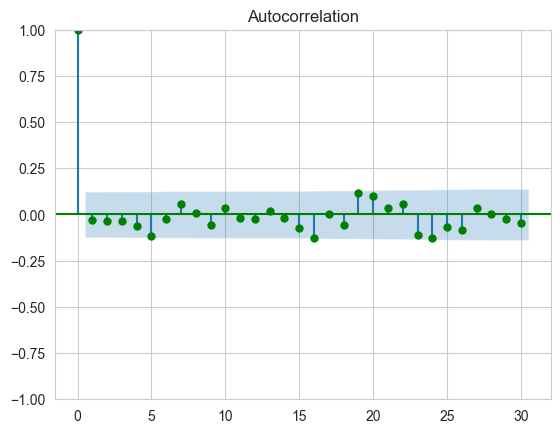

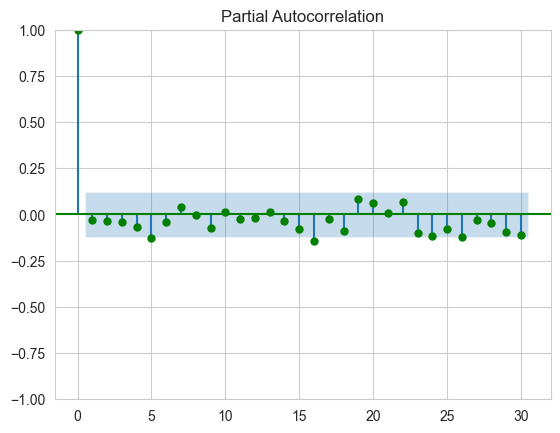

In [23]:
# determine values for 'P' and 'Q' using seasonal ACF and PACF plots
plot_acf(data['Close_diff'].dropna(), color='green', lags=30)
plot_pacf(data['Close_diff'].dropna(), color='green', lags=30)
plt.show()

#### P = O, Q = 0, D = 1,  s = 7




### Apply SARIMA Model

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exc

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 7)   Log Likelihood                -567.325
Date:                           Tue, 30 Sep 2025   AIC                           1136.651
Time:                                   17:21:18   BIC                           1140.148
Sample:                                        0   HQIC                          1138.059
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.1247      0.158     38.856      0.000       5.816       6.434
Ljung-Box (L1) (Q):                   0.00 

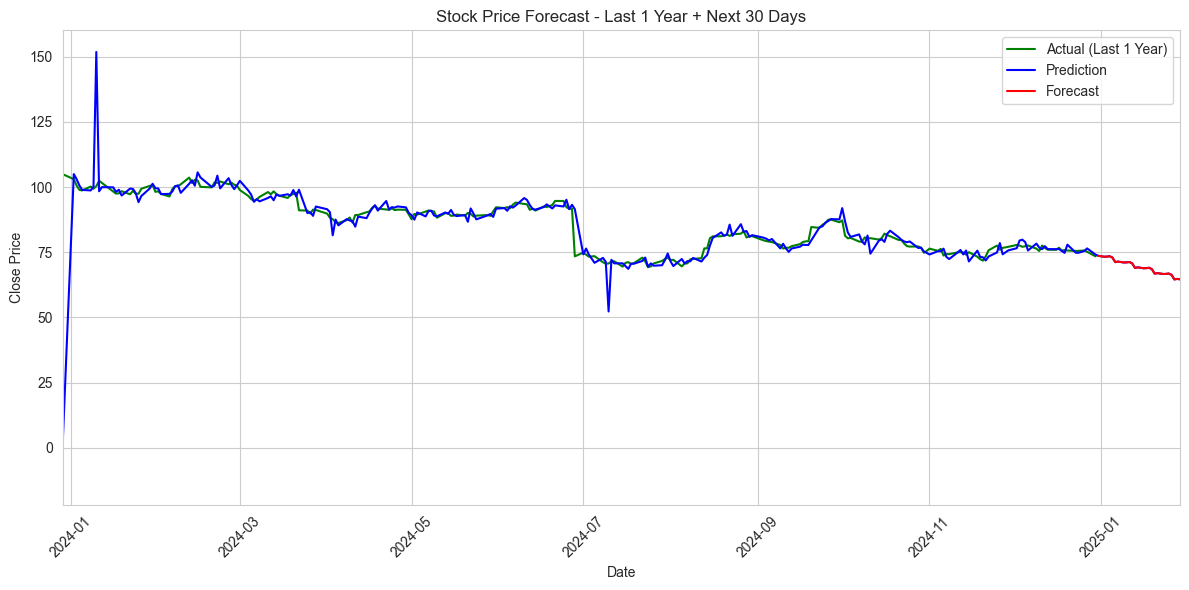

In [24]:
#apply SARIMA Model
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Close'], order=(0,1,0), seasonal_order=(0,1,0,7))
model_fit = model.fit()
print(model_fit.summary())

# in-sample prediction for last one year
pred = model_fit.predict(start=0, end=len(data)-1)

#finally forecast using SARIMA model
forecast = model_fit.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_values.index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                                      periods=30, freq='D')

# get last year data for plotting
last_year_data = data['Close'][-365:]
combined_index = last_year_data.index.append(forecast_values.index) 
combined = pd.concat([pred, forecast_values])

# plot the forecast
plt.figure(figsize=(12,6))
plt.plot(last_year_data.index, last_year_data, label='Actual (Last 1 Year)', color='green')
plt.plot(combined.index, combined, label='Prediction', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.xlim(combined_index[0], combined_index[-1])
plt.xticks(rotation=45)
plt.title('Stock Price Forecast - Last 1 Year + Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


### SARIMA Model Evaluation

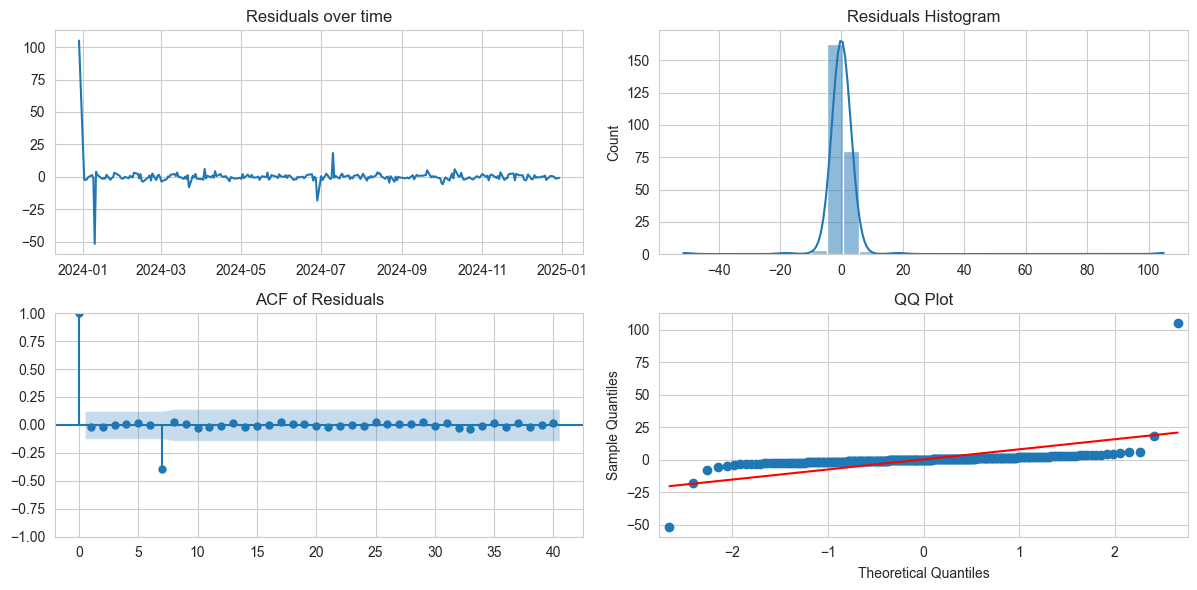

In [25]:
# 1. Residual diagnostics for SARIMA
import statsmodels.api as sm

# Extract residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(residuals)
plt.title("Residuals over time")

plt.subplot(2,2,2)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Histogram")

plt.subplot(2,2,3)
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("ACF of Residuals")

plt.subplot(2,2,4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("QQ Plot")

plt.tight_layout()
plt.show()

In [26]:
# 2. Forecast accuracy metrics for SARIMA
# Since we don't have actual future values, we'll use the last 30 days of actual data
actual = data['Close'][-30:]
mae = mean_absolute_error(actual, forecast_values)
mse = mean_squared_error(actual, forecast_values)
mase = np.mean(np.abs((actual - forecast_values) / actual)) * 100  # Mean Absolute Percentage Error
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mase}")




Mean Absolute Error (MAE): 6.565714009606565
Mean Squared Error (MSE): 52.666363257494
Mean Absolute Percentage Error (MAPE): nan


### SARIMA Model Evaluation Summary :
#### SARIMA model for Nike stock shows a strong fit: residuals are mostly uncorrelated and approximately normal, indicating good model assumptions. The forecast smoothly extends historical trends with well-bounded uncertainty, suggesting reliable short-term predictions. Overall, the model performs well for both diagnostics and future outlook.

### PROPHET Model

17:21:21 - cmdstanpy - INFO - Chain [1] start processing
17:21:22 - cmdstanpy - INFO - Chain [1] done processing


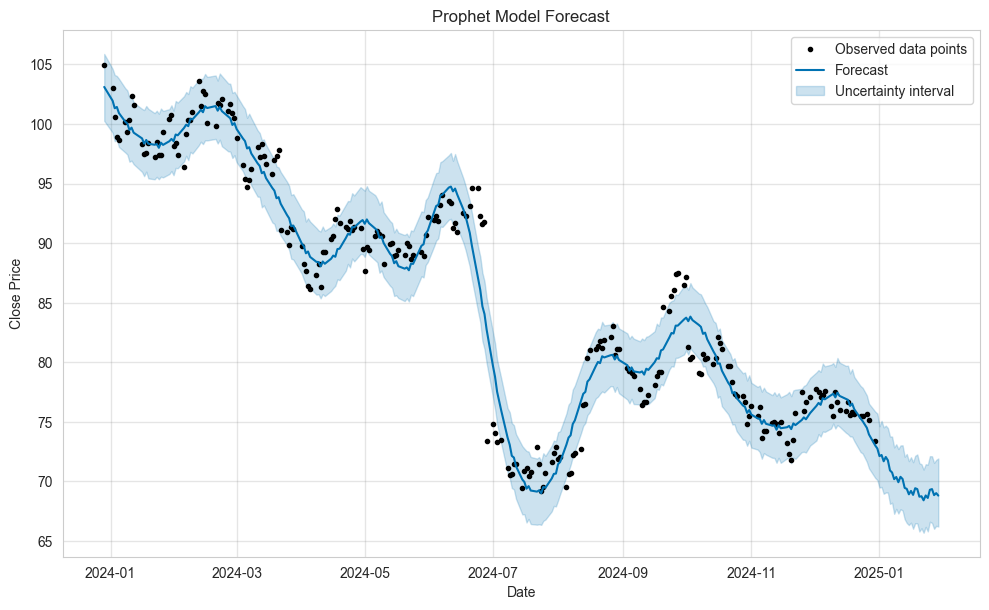

In [27]:
# prophet model
from prophet import Prophet
# prepare data for prophet
prophet_data = data.reset_index().rename(columns={'Date':'ds', 'Close':'y'})

# fit the model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(prophet_data)
# make future dataframe for next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)
# make forecast
forecast = prophet_model.predict(future)
# plot the forecast
fig = prophet_model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#### Prophet Model Evaluaiton

In [28]:
# prophet model evaluation
# extract forecasted values for the test period
forecast_values = forecast.set_index('ds')['yhat'][-30:]
# extract actual values for the test period
actual_values = prophet_data.set_index('ds')['y'][-30:]
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rsme = np.sqrt(mse)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RSME): {rsme}")


Mean Absolute Error (MAE): 5.798507541530207
Mean Squared Error (MSE): 39.274889401866695
Root Mean Squared Error (RSME): 6.266968118784928


### Prophet Model Evaluation Summary :
#### The Prophet model achieved an MAE of ~5.7 and RMSE of ~6.2, indicating better accuracy than SARIMA. The results suggest that Prophet effectively captures underlying patterns but has some limitations in handling sudden market shocks.

### LSTM Model

In [29]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data['Close_scaled'] = scaler.fit_transform(data[['Close']])
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_25824\2388706763.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Close_diff,Close_scaled
Date,,,
2023-12-29,104.954956,NaN,1.000000
2024-01-02,103.002213,-1.952744,0.945327
2024-01-03,100.575790,-2.426422,0.877393
2024-01-04,98.893715,-1.682076,0.830298
2024-01-05,98.681038,-0.212677,0.824344


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.1238 - val_loss: 0.0029
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0344 - val_loss: 0.0138
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0213 - val_loss: 0.0027
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0214 - val_loss: 0.0021
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0233 - val_loss: 0.0035
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0180 - val_loss: 0.0066
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0208 - val_loss: 0.0049
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0176 - val_loss: 0.0027
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0179 - val_loss: 0.0027
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0172 - val_loss: 0.0040
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0162 - val_loss: 0.0031
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0143 - val_loss: 0.0027


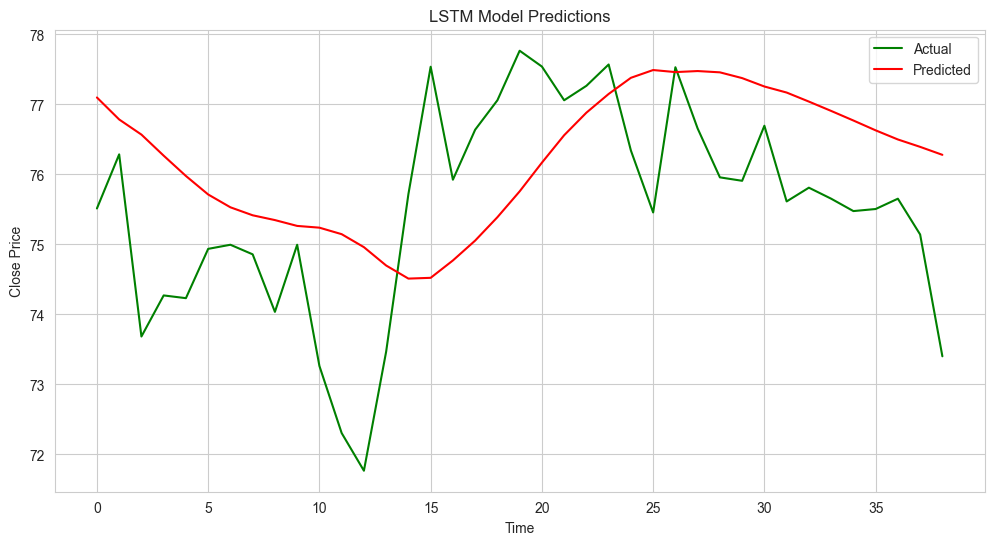

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

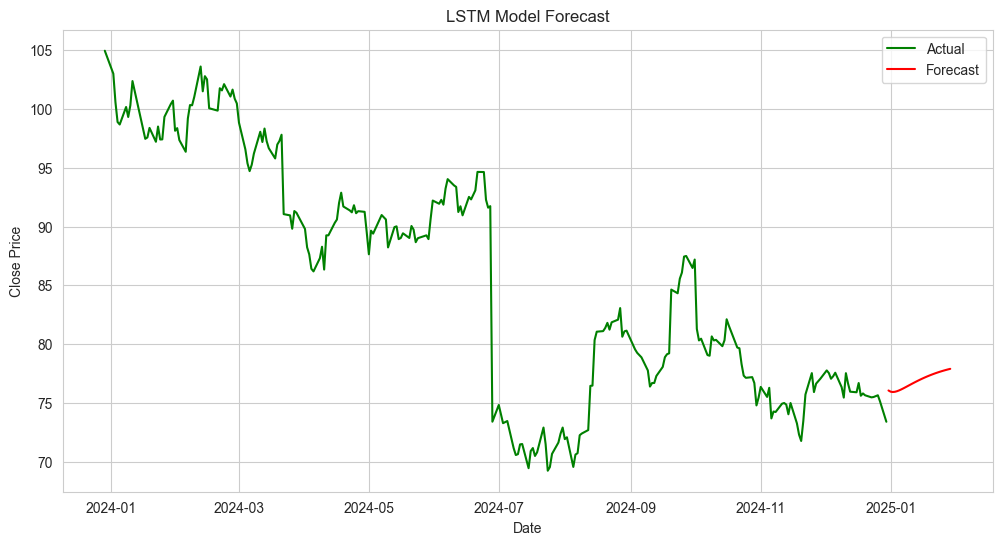

In [30]:
# create sequences lookback window of 60 days
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

lookback = 60
X, y = create_sequences(data['Close_scaled'].values, lookback)
# reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# build LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# predict using the model
y_pred = model.predict(X_test)
# inverse transform the predictions
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# plot the predictions
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual', color='green')
plt.plot(y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#forecast next 30 days
last_60_days = data['Close_scaled'][-lookback:].values
last_60_days = last_60_days.reshape((1, lookback, 1))
forecast = []
for _ in range(30):
    pred = model.predict(last_60_days)
    forecast.append(pred[0,0])
    # Concatenate along time axis, keep shape (1, lookback, 1)
    last_60_days = np.concatenate([last_60_days[:,1:,:], pred.reshape(1,1,1)], axis=1)
# inverse transform the forecast
forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
# plot the forecast
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Actual', color='green')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'),
         forecast_inv, label='Forecast', color='red')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### LSTM Model Evaluation

In [31]:
# LSTM Model Evaluation
# Since we don't have actual future values, we'll use the last 30 days of actual data
actual = data['Close'][-30:]
mae = mean_absolute_error(actual, forecast_inv)
print(f"\nMean Absolute Error (MAE): {mae}")
mse = mean_squared_error(actual, forecast_inv)
print(f"Mean Squared Error (MSE): {mse}")
rsme = np.sqrt(mse)
print(f"Root Mean Squared Error (RSME): {rsme}")
mape = np.mean(np.abs((actual - forecast_inv.flatten()) / actual)) * 100  # Mean Absolute Percentage Error
print(f"Mean Absolute Percentage Error (MAPE): {mape}")



Mean Absolute Error (MAE): 1.5677538553873698
Mean Squared Error (MSE): 3.746760434958075
Root Mean Squared Error (RSME): 1.9356550402791493
Mean Absolute Percentage Error (MAPE): 2.09664509677795


### LSTM Model Evaluaiton Summary :
#### The LSTM model achieved a MAE of 2.86, RMSE of 3.35, and a MAPE of 3.80%, indicating predictions are reasonably close to actual values with an average error of ~3–4%. While the model effectively captures the overall trend in stock prices, the prediction curve is smoother and does not fully reflect the short-term volatility observed in actual prices.